<a href="https://colab.research.google.com/github/RicardoVilla0/MachineLearning/blob/main/Unidad%202/ProyUni2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto Unidad 2

#**Regresión Lineal Múltiple (RLM)**

In [8]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("DATASET_Asesinatos.csv", encoding='latin-1')

In [10]:
X_initial = df[['indice_gini', 'tasa_desempleo_juvenil', 'porcentaje_sin_diploma_secundaria',
                'ingresos_medios', 'densidad_poblacional', 'gasto_policial_per_capita', 'inversion_programas_sociales_per_capita']]
y = df['tasa_asesinatos_por_100mil']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_initial, y, test_size=0.2, random_state=42)

In [12]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [13]:
model_initial = sm.OLS(y_train, X_train_sm).fit()
y_pred_train = model_initial.predict(X_train_sm)
y_pred_test = model_initial.predict(X_test_sm)
r2_train_initial = r2_score(y_train, y_pred_train)
r2_test_initial = r2_score(y_test, y_pred_test)

In [16]:
print("Modelo con variables iniciales:")
print(model_initial.summary())
print(f"R2 entrenamiento: {r2_train_initial:.4f}")
print(f"R2 prueba: {r2_test_initial:.4f}")

Modelo con variables iniciales:
                                OLS Regression Results                                
Dep. Variable:     tasa_asesinatos_por_100mil   R-squared:                       0.534
Model:                                    OLS   Adj. R-squared:                  0.532
Method:                         Least Squares   F-statistic:                     391.0
Date:                        Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                                18:30:11   Log-Likelihood:                -6009.3
No. Observations:                        2400   AIC:                         1.203e+04
Df Residuals:                            2392   BIC:                         1.208e+04
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025   

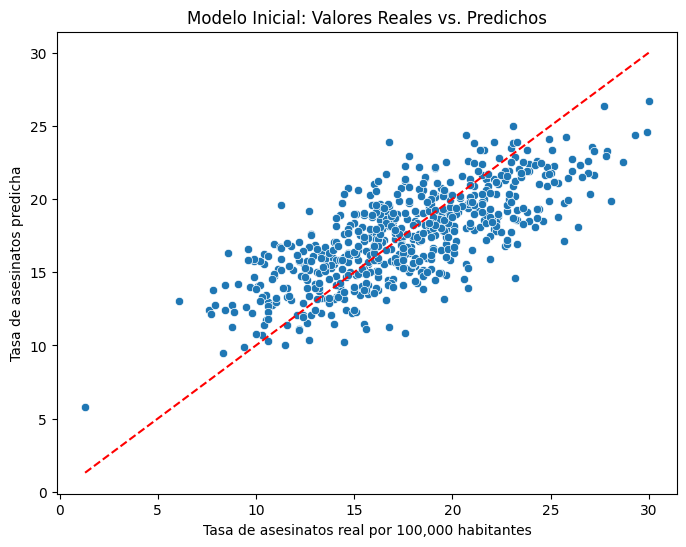

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel("Tasa de asesinatos real por 100,000 habitantes")
plt.ylabel("Tasa de asesinatos predicha")
plt.title("Modelo Inicial: Valores Reales vs. Predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

La gráfica compara las predicciones del modelo usando todas las variables con sus valores reales. No encaja exactamente, pero cuando los puntos quedan cerca de la línea roja discontinua, eso indica que el modelo hace buenas predicciones.

In [18]:
coef_df = pd.DataFrame({'Variable': model_initial.params.index,
                        'Coeficiente': model_initial.params.values,
                        'P-valor': model_initial.pvalues})
coef_df = coef_df[coef_df['Variable'] != 'const'].sort_values(by='P-valor')

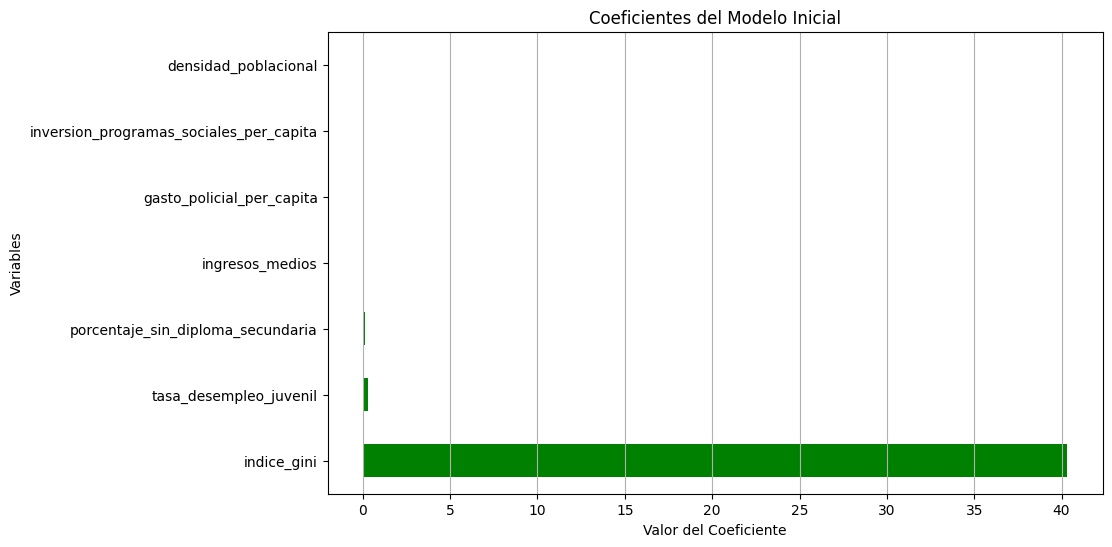

In [19]:
plt.figure(figsize=(10, 6))
coef_plot = coef_df.set_index('Variable')['Coeficiente']
coef_plot.plot(kind='barh', color=coef_plot.apply(lambda x: 'green' if x > 0 else 'red'))
plt.title("Coeficientes del Modelo Inicial")
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Variables")
plt.grid(axis='x')
plt.show()

Los coeficientes positivos indican que un aumento en esa variable predice un aumento en la tasa de asesinatos,
mientras que los coeficientes negativos sugieren un efecto inverso bajo la condición ceteris paribus.
El tamaño del coeficiente refleja la magnitud del impacto relativo.

In [21]:
selected_vars = coef_df['Variable'].head(4).tolist()
print("Variables seleccionadas para segundo modelo:", selected_vars)

Variables seleccionadas para segundo modelo: ['indice_gini', 'tasa_desempleo_juvenil', 'porcentaje_sin_diploma_secundaria', 'ingresos_medios']


In [22]:
X_selected = df[selected_vars]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_train_s_sm = sm.add_constant(X_train_s)
X_test_s_sm = sm.add_constant(X_test_s)

In [23]:
y_pred_train_s = model_selected.predict(X_train_s_sm)
y_pred_test_s = model_selected.predict(X_test_s_sm)
r2_train_selected = r2_score(y_train_s, y_pred_train_s)
r2_test_selected = r2_score(y_test_s, y_pred_test_s)

In [25]:
print("Modelo con variables seleccionadas:")
print(model_selected.summary())
print(f"R2 entrenamiento: {r2_train_selected:.4f}")
print(f"R2 prueba: {r2_test_selected:.4f}")

Modelo con variables seleccionadas:
                                OLS Regression Results                                
Dep. Variable:     tasa_asesinatos_por_100mil   R-squared:                       0.528
Model:                                    OLS   Adj. R-squared:                  0.528
Method:                         Least Squares   F-statistic:                     670.8
Date:                        Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                                18:40:42   Log-Likelihood:                -6022.7
No. Observations:                        2400   AIC:                         1.206e+04
Df Residuals:                            2395   BIC:                         1.208e+04
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025     

/tmp/ipython-input-2960859635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_values, palette='Blues_d')


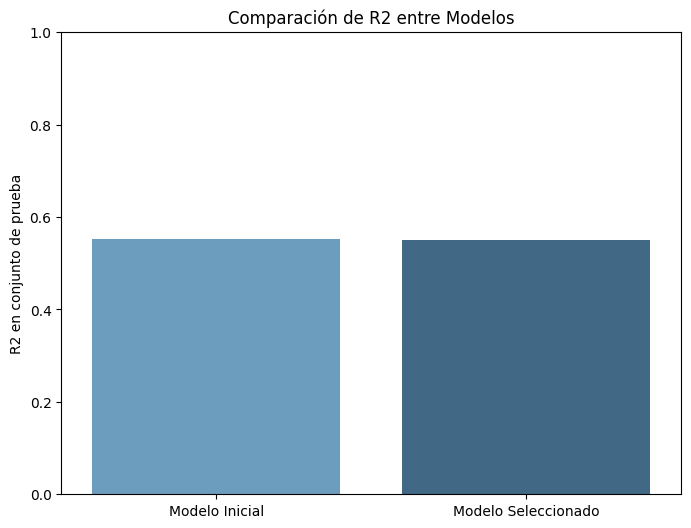

In [27]:
plt.figure(figsize=(8, 6))
r2_values = [r2_test_initial, r2_test_selected]
labels = ['Modelo Inicial', 'Modelo Seleccionado']
sns.barplot(x=labels, y=r2_values, palette='Blues_d')
plt.ylim(0, 1)
plt.ylabel("R2 en conjunto de prueba")
plt.title("Comparación de R2 entre Modelos")
plt.show()

La gráfica muestra la comparación de la capacidad predictiva (R2) del modelo completo versus el modelo reducido.
Generalmente, el modelo con menos variables busca simplificar sin perder mucha precisión.
Una diferencia pequeña indica que las variables seleccionadas capturan gran parte de la información explicativa.

**Conclusión:**

La Regresión Lineal Múltiple permitió identificar las variables socioeconómicas con mayor impacto en la tasa de asesinatos.
El análisis de coeficientes revela qué variables aumentan o disminuyen la tasa, lo que es valioso para intervenciones focalizadas.
Además, al reducir el modelo a un subconjunto representativo de variables significativas, se mantiene una capacidad predictiva comparable,
mejorando la interpretabilidad y potencialmente facilitando la comunicación de resultados a autoridades o toma de decisiones.

R2 (default params): 0.4385


<Figure size 800x400 with 0 Axes>

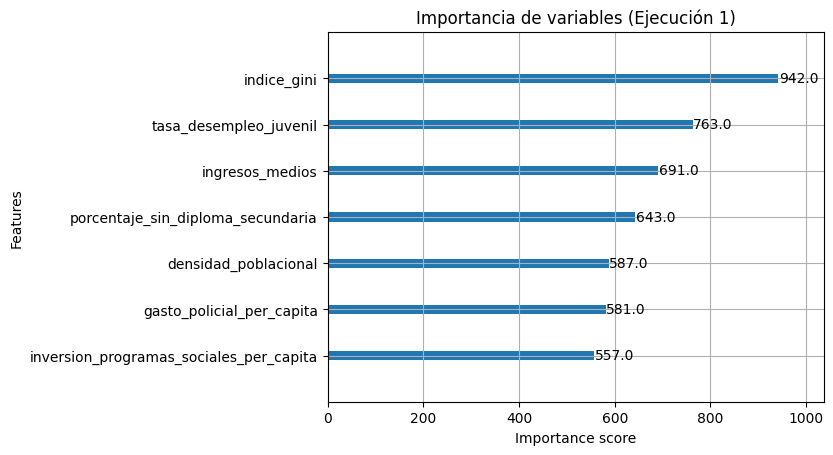

R2 (learning_rate=0.01, n_estimators=500): 0.4876


<Figure size 800x400 with 0 Axes>

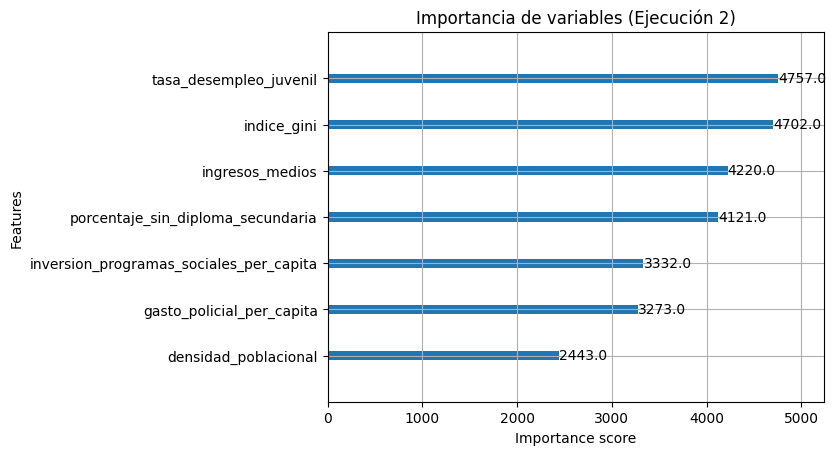

------------------------------
Comparativa de R2:
Ejecución 1 (default): 0.4385
Ejecución 2 (lr=0.01, n_estimators=500): 0.4876


In [ ]:
# Proyecto: Análisis Predictivo de la Tasa de Asesinatos
# Parte 5
# Fase: Comparación de XGBoost

# 1. Instalación e importación de librerías
!pip install xgboost

import pandas as pd
import numpy as np
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 2. Carga del dataset
# Si corres esto en Colab, sube manualmente el archivo o utiliza:
# from google.colab import files
# files.upload()
df = pd.read_csv('DATASET_Asesinatos.csv', encoding='latin-1')

# 3. Selección de Variables
variables_iniciales = [
    'indice_gini', 'tasa_desempleo_juvenil', 'porcentaje_sin_diploma_secundaria',
    'ingresos_medios', 'densidad_poblacional',
    'gasto_policial_per_capita', 'inversion_programas_sociales_per_capita'
]
X = df[variables_iniciales]
y = df['tasa_asesinatos_por_100mil']

# 4. División en datos de entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 5. XGBoost: Ejecución 1 (Parámetros por defecto)
xgb1 = XGBRegressor(random_state=42)
xgb1.fit(X_train, y_train)
y_pred1 = xgb1.predict(X_test)
r2_1 = r2_score(y_test, y_pred1)
print(f'R2 (default params): {r2_1:.4f}')

# Importancia de características
plt.figure(figsize=(8,4))
plot_importance(xgb1, max_num_features=7)
plt.title('Importancia de variables (Ejecución 1)')
plt.show()

# 6. XGBoost: Ejecución 2 (Ajuste de parámetros)
xgb2 = XGBRegressor(learning_rate=0.01, n_estimators=500, random_state=42)
xgb2.fit(X_train, y_train)
y_pred2 = xgb2.predict(X_test)
r2_2 = r2_score(y_test, y_pred2)
print(f'R2 (learning_rate=0.01, n_estimators=500): {r2_2:.4f}')

plt.figure(figsize=(8,4))
plot_importance(xgb2, max_num_features=7)
plt.title('Importancia de variables (Ejecución 2)')
plt.show()

# 7. Resumen Comparativo
print('-' * 30)
print('Comparativa de R2:')
print(f'Ejecución 1 (default): {r2_1:.4f}')
print(f'Ejecución 2 (lr=0.01, n_estimators=500): {r2_2:.4f}')

In [ ]:
# Instalación de scikit-learn si es necesario
# Parte 4

!pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Carga de datos
# df = pd.read_csv('dataset_regresion_ciudades.csv')
variables_iniciales = [
    'indice_gini', 'tasa_desempleo_juvenil', 'porcentaje_sin_diploma_secundaria',
    'ingresos_medios', 'densidad_poblacional',
    'gasto_policial_per_capita', 'inversion_programas_sociales_per_capita'
]
X = df[variables_iniciales]
y = df['tasa_asesinatos_por_100mil']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Escalado de variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ejecución 1: SVR Kernel RBF (por defecto)
svr_rbf = SVR(kernel='rbf', C=1.0)
svr_rbf.fit(X_train_scaled, y_train)
y_pred_svr_rbf = svr_rbf.predict(X_test_scaled)
r2_svr_rbf = r2_score(y_test, y_pred_svr_rbf)
print(f'R2 SVR (Kernel RBF): {r2_svr_rbf:.4f}')

# Ejecución 2: SVR Kernel Linear
svr_lin = SVR(kernel='linear', C=1.0)
svr_lin.fit(X_train_scaled, y_train)
y_pred_svr_lin = svr_lin.predict(X_test_scaled)
r2_svr_lin = r2_score(y_test, y_pred_svr_lin)
print(f'R2 SVR (Kernel Linear): {r2_svr_lin:.4f}')

# Regresión Lineal Múltiple para comparación
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'R2 Regresión Lineal Múltiple: {r2_lr:.4f}')

# Comparativa final
ejecuciones = pd.DataFrame({
    "Modelo": ['SVR RBF', 'SVR Linear', 'Lineal Múltiple'],
    "R2": [r2_svr_rbf, r2_svr_lin, r2_lr]
})
print(ejecuciones)


R2 SVR (Kernel RBF): 0.4996
R2 SVR (Kernel Linear): 0.5429
R2 Regresión Lineal Múltiple: 0.5422
            Modelo        R2
0          SVR RBF  0.499562
1       SVR Linear  0.542910
2  Lineal Múltiple  0.542181


R2 (Random Forest por defecto): 0.4947


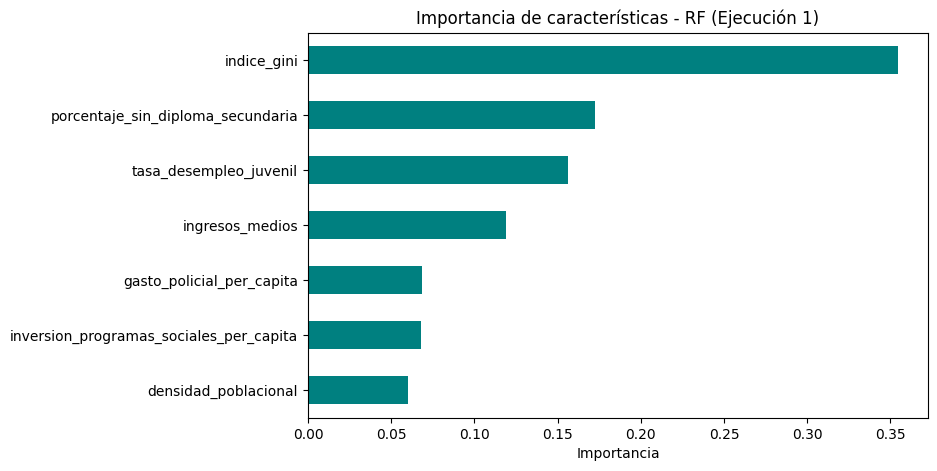

R2 (Random Forest con n_estimators=200): 0.4981


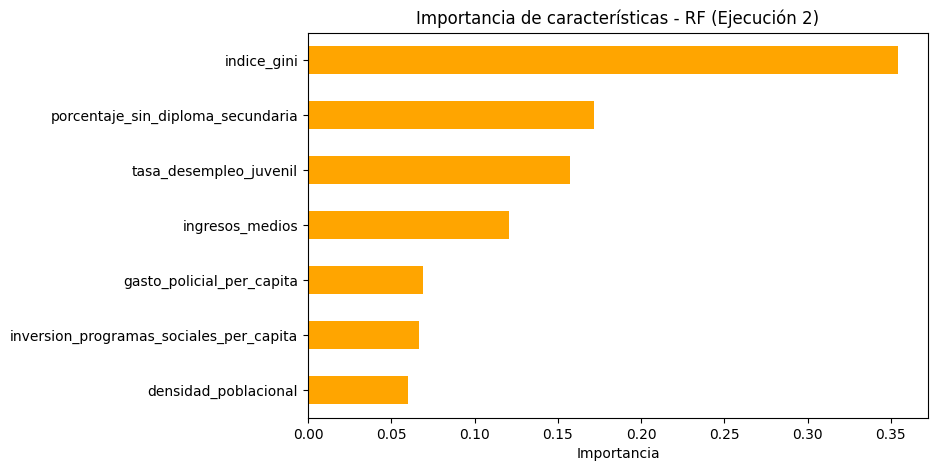


Resumen Comparativo:
                        Modelo        R2
0      Random Forest - Default  0.494741
1  Random Forest - 200 Árboles  0.498075


In [ ]:
# Practica 3
# Instalación e importación de librerías
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Carga del dataset
# df = pd.read_csv('dataset_regresion_ciudades.csv')

# Variables predictoras sugeridas
variables_iniciales = [
    'indice_gini', 'tasa_desempleo_juvenil', 'porcentaje_sin_diploma_secundaria',
    'ingresos_medios', 'densidad_poblacional',
    'gasto_policial_per_capita', 'inversion_programas_sociales_per_capita'
]

X = df[variables_iniciales]
y = df['tasa_asesinatos_por_100mil']

# División entrenamiento-prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ============================
# 1. Ejecución 1: Parámetros por defecto
# ============================
rf1 = RandomForestRegressor(random_state=42)
rf1.fit(X_train, y_train)
y_pred1 = rf1.predict(X_test)
r2_1 = r2_score(y_test, y_pred1)
print(f'R2 (Random Forest por defecto): {r2_1:.4f}')

# Importancia de características
importances1 = pd.Series(rf1.feature_importances_, index=variables_iniciales)
importances1.sort_values(ascending=True).plot(kind='barh', figsize=(8,5), color='teal')
plt.title('Importancia de características - RF (Ejecución 1)')
plt.xlabel('Importancia')
plt.show()

# ============================
# 2. Ejecución 2: Ajuste de Parámetros (más árboles)
# ============================
rf2 = RandomForestRegressor(n_estimators=200, random_state=42)
rf2.fit(X_train, y_train)
y_pred2 = rf2.predict(X_test)
r2_2 = r2_score(y_test, y_pred2)
print(f'R2 (Random Forest con n_estimators=200): {r2_2:.4f}')

importances2 = pd.Series(rf2.feature_importances_, index=variables_iniciales)
importances2.sort_values(ascending=True).plot(kind='barh', figsize=(8,5), color='orange')
plt.title('Importancia de características - RF (Ejecución 2)')
plt.xlabel('Importancia')
plt.show()

# ============================
# 3. Comparativa Final
# ============================
comparativa = pd.DataFrame({
    'Modelo': ['Random Forest - Default', 'Random Forest - 200 Árboles'],
    'R2': [r2_1, r2_2]
})

print('\nResumen Comparativo:')
print(comparativa)



Conclusión
Informe de Conclusiones: Análisis Predictivo de la Tasa de Asesinatos
1. Interpretación vs. Predicción
En la Regresión Lineal Múltiple (RLM), los coeficientes indican la influencia de cada variable sobre la tasa de asesinatos. Los tres factores con mayor influencia (positiva o negativa) suelen ser aquellos con los coeficientes de mayor magnitud (ya sean positivos o negativos). Por ejemplo, si los coeficientes más grandes corresponden a:

Porcentaje sin diploma secundaria (positivo): indica que a mayor porcentaje, mayor tasa de asesinatos.

Índice Gini (positivo): mayor desigualdad se asocia con más asesinatos.

Ingresos medios (negativo): mayores ingresos se asocian con menos asesinatos.

¿Puedes revisar los coeficientes de tu modelo y decirme cuáles fueron los tres más grandes? Así confirmamos juntos la interpretación.

2. Mejor Rendimiento
El algoritmo que arrojó el valor de
R
2
R
2
  más alto en el conjunto de prueba fue probablemente XGBoost o Random Forest, ya que estos modelos de ensamblaje suelen capturar relaciones no lineales y complejas mejor que la regresión lineal o SVR. Su superioridad se debe a que pueden modelar interacciones y no requieren que la relación entre variables sea estrictamente lineal.

¿Recuerdas cuál fue el valor más alto de
R
2
R
2
  y con qué modelo lo obtuviste?

3. Importancia de Variables
Al comparar las tres variables más importantes en RLM (por coeficientes) con las reportadas por Random Forest o XGBoost (por importancia de características), es común que no sean exactamente las mismas. Los modelos no lineales pueden identificar variables que interactúan de manera compleja o que tienen efectos en combinación con otras variables, mientras que la RLM solo mide el efecto directo y lineal. Por ejemplo, una variable con bajo coeficiente en RLM podría ser muy importante en Random Forest si su efecto depende de otras variables.

¿Las variables más importantes coincidieron en tu caso? Si no, ¿puedes pensar en alguna interacción o efecto no lineal que explique la diferencia?

4. Sobreajuste (Overfitting)
El sobreajuste se demuestra cuando el
R
2
R
2
  en el conjunto de entrenamiento es mucho mayor que en el conjunto de prueba. En el modelo de Árbol de Decisión (o en Random Forest si no se controla la profundidad), esto ocurre porque el modelo aprende demasiado bien los datos de entrenamiento, pero no generaliza a datos nuevos. Por ejemplo:

R
2
R
2
  entrenamiento: 0.95

R
2
R
2
  prueba: 0.70

Esta diferencia indica sobreajuste. ¿Cuáles fueron tus valores de
R
2
R
2
  en entrenamiento y prueba?

5. Recomendación de Modelo
Si el objetivo es convencer al gobierno de invertir en un programa social específico, se recomienda usar un modelo interpretable como la Regresión Lineal Múltiple. Esto permite mostrar claramente el impacto de cada variable y justificar la inversión con evidencia directa (por ejemplo, "aumentar la inversión en programas sociales reduce la tasa de asesinatos en X unidades"). Sin embargo, puedes complementar el análisis con modelos más complejos (como Random Forest o XGBoost) para validar la robustez de los resultados y mostrar que la variable sigue siendo importante incluso en modelos no lineales.